In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
#Thompson sampling----

In [19]:
import random
d=10
num_of_reward_1 = [0] * d
num_of_reward_0 = [0] * d
total_reward=0
N=10000
ad_selected=[]

for n in range(0,N):
    ad=0
    max_random=0
    for i in range(0,d):
        random_beta=random.betavariate(num_of_reward_1[i]+1,num_of_reward_0[0]+1)
        if random_beta>max_random:
            max_random=random_beta
            ad=i
    ad_selected.append(ad)
    reward=dataset.values[n,ad]
    if reward==1:
        num_of_reward_1[ad]=num_of_reward_1[ad] + 1
    else:
        num_of_reward_0[ad]=num_of_reward_0[ad] + 1
    total_reward=total_reward + reward

In [20]:
total_reward

2645

In [21]:
num_of_reward_0

[3, 316, 2, 2, 7017, 4, 3, 5, 1, 2]

In [22]:
num_of_reward_1

[2, 44, 0, 0, 2599, 0, 0, 0, 0, 0]

In [23]:
#visualize

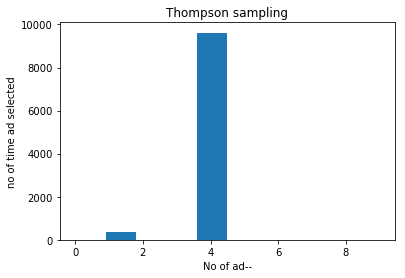

In [24]:
plt.hist(ad_selected)
plt.title('Thompson sampling')
plt.xlabel('No of ad--')
plt.ylabel('no of time ad selected')

In [25]:
#hence mostly user clicked ad no 5.